In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
sample_data = {}
sample_data_raw = {}
data_paths = ['/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_trimmed/TET2/1_Bisulfite-Seq_SRR21658932/SRR21658932_trimmed_bismark_bt2.bismark.cov.gz',
             '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_trimmed/TET2/2_Bisulfite-Seq_SRR21658928/SRR21658928_trimmed_bismark_bt2.bismark.cov.gz',
             '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_trimmed/TET2/3_Bisulfite-Seq_SRR21658920/SRR21658920_trimmed_bismark_bt2.bismark.cov.gz',
             '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_trimmed/TET2/4_Bisulfite-Seq_SRR21658916/SRR21658916_trimmed_bismark_bt2.bismark.cov.gz',
             '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_trimmed/TET2/5_Bisulfite-Seq_SRR21658912/SRR21658912_trimmed_bismark_bt2.bismark.cov.gz']

data_paths_raw = ['/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/1_Bisulfite-Seq_SRR21658932/SRR21658932_bismark_bt2.bismark.cov.gz',
                  '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/2_Bisulfite-Seq_SRR21658928/SRR21658928_bismark_bt2.bismark.cov.gz',
                  '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/3_Bisulfite-Seq_SRR21658920/SRR21658920_bismark_bt2.bismark.cov.gz',
                  '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/4_Bisulfite-Seq_SRR21658916/SRR21658916_bismark_bt2.bismark.cov.gz',
                  '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/5_Bisulfite-Seq_SRR21658912/SRR21658912_bismark_bt2.bismark.cov.gz']
                  
columns = ['chr', 'start', 'end', 'coverage', 'numCs', 'numTs']
for i in range(1,6):
    sample_name = 'm' + str(i)
    path_nr = i - 1
    data = pd.read_csv(data_paths[path_nr], compression = 'gzip', sep = '\t', dtype ={'chr':str}, names = columns)
    data_raw = pd.read_csv(data_paths_raw[path_nr], compression = 'gzip', sep = '\t', dtype ={'chr':str}, names = columns)
    sample_data[sample_name] = data
    sample_data_raw[sample_name] = data_raw

In [3]:
#print(sample_data)

In [11]:
#gata2_v2 <- c(6,88199000,88200600)
#gata2_v1 <- c(6, 88193600, 88195001)
def keep_promoter_regions(df):
    copy = df.copy()
    promoter_regions = {
        'fut': {'chr': '12', 'start': 77237400, 'end': 77240801},
        'gata_v1':{'chr': '6', 'start': 88193600, 'end': 88195001},
        'gata_v2': {'chr': '6', 'start': 88199000, 'end': 88200600},
        #'gata_v2': {'chr': '6', 'start': 88193600, 'end': 88195001},
        'sirt5': {'chr': '13', 'start': 43365000, 'end': 43366401}
    }
    # Initialize an empty DataFrame to store the filtered rows
    filtered_rows = pd.DataFrame()
    # Iterate over the promoter regions
    for promoter, conditions in promoter_regions.items():
        # Apply the conditions for each promoter and concatenate the results
        copy['gene'] = promoter
        promoter_criteria = (
            (copy['chr'] == conditions['chr']) &
            (copy['start'] >= conditions['start']) &
            (copy['end'] <= conditions['end'])
        )
        promoter_rows = copy[promoter_criteria]
        #promoter_rows.loc[:, 'gene'] = promoter
        filtered_rows = pd.concat([filtered_rows, promoter_rows])
    return filtered_rows



In [80]:
promoter_data = {} 
for mouse in sample_data.keys():
    promoter_data[mouse] = keep_promoter_regions(sample_data[mouse])
    #promoter_data[mouse]['sum'] = promoter_data[mouse]['numCs'] + promoter_data[mouse]['numTs']
    #promoter_data[mouse] = promoter_data[mouse][promoter_data[mouse]['sum'] > 1]

In [81]:
#promoter_data_raw = {} 
#for mouse in sample_data_raw.keys():
#    promoter_data_raw[mouse] = keep_promoter_regions(sample_data_raw[mouse])

In [102]:
for mouse in promoter_data.keys():
    print(promoter_data[mouse][promoter_data[mouse]['gene']=='gata_v1'])
    print(len(promoter_data[mouse][promoter_data[mouse]['gene']=='gata_v1']))

         chr     start       end  coverage  numCs  numTs     gene
11266286   6  88193600  88193600       0.0      0      1  gata_v1
11266287   6  88193656  88193656       0.0      0      1  gata_v1
11266288   6  88193659  88193659       0.0      0      1  gata_v1
11266289   6  88193675  88193675       0.0      0      1  gata_v1
11266290   6  88193686  88193686       0.0      0      1  gata_v1
...       ..       ...       ...       ...    ...    ...      ...
11266372   6  88194851  88194851       0.0      0      1  gata_v1
11266373   6  88194861  88194861       0.0      0      2  gata_v1
11266374   6  88194862  88194862       0.0      0      1  gata_v1
11266375   6  88194894  88194894     100.0      1      0  gata_v1
11266376   6  88194895  88194895     100.0      1      0  gata_v1

[91 rows x 7 columns]
91
        chr     start       end  coverage  numCs  numTs     gene
6157681   6  88193758  88193758     100.0      1      0  gata_v1
6157682   6  88193763  88193763       0.0      0    

In [83]:
mean_coverage = {}
sem_coverage = {}

for mouse in promoter_data:
    grouped = promoter_data[mouse].groupby('gene')
    gene_coverage = {}
    gene_sem = {}
    for gene, group_df in grouped:
        mean_coverage_value = group_df['coverage'].mean()
        sem_coverage_value = group_df['coverage'].sem()
        gene_coverage[gene] = mean_coverage_value
        gene_sem[gene] = sem_coverage_value
    mean_coverage[mouse] = gene_coverage
    sem_coverage[mouse] = gene_sem
    

In [84]:
mean_coverage_raw = {}

for mouse in promoter_data_raw :
    grouped = promoter_data_raw[mouse].groupby('gene')
    gene_coverage = {}
    for gene, group_df in grouped:
        mean_coverage_value = group_df['coverage'].mean()
        gene_coverage[gene] = mean_coverage_value
    mean_coverage_raw[mouse] = gene_coverage


In [85]:
#DOES NOT CHANGE ANYTHING
print(mean_coverage)
print(sem_coverage)
#print(mean_coverage_raw)

{'m1': {'fut': 0.5446623093681915, 'gata_v1': 3.8461538461538463, 'gata_v2': 13.425925925925927, 'sirt5': 4.273504273504274}, 'm2': {'fut': 0.746268656716418, 'gata_v1': 5.47945205479452, 'gata_v2': 13.802083333333332, 'sirt5': 1.4705882352941178}, 'm3': {'fut': 0.0, 'gata_v1': 3.4136546184738954, 'gata_v2': 30.687830687830687, 'sirt5': 9.325396825396826}, 'm4': {'fut': 1.3274336283185841, 'gata_v1': 6.051454138702462, 'gata_v2': 22.13732004429679, 'sirt5': 0.0}, 'm5': {'fut': 2.4509803921568625, 'gata_v1': 2.9535864978902953, 'gata_v2': 17.67676767676768, 'sirt5': 8.156028368794326}}
{'m1': {'fut': 0.39156716482674053, 'gata_v1': 1.7870052626594093, 'gata_v2': 3.738991389200105, 'sirt5': 3.0440084877583753}, 'm2': {'fut': 0.746268656716418, 'gata_v1': 2.49840966075791, 'gata_v2': 4.208694905298583, 'sirt5': 1.4705882352941175}, 'm3': {'fut': 0.0, 'gata_v1': 1.8240205535852885, 'gata_v2': 5.583727205187909, 'sirt5': 4.097887430192871}, 'm4': {'fut': 0.7629803632081159, 'gata_v1': 1.592

In [86]:
df = pd.DataFrame(mean_coverage)
df = df.transpose()


In [87]:
print(df)

         fut   gata_v1    gata_v2     sirt5
m1  0.544662  3.846154  13.425926  4.273504
m2  0.746269  5.479452  13.802083  1.470588
m3  0.000000  3.413655  30.687831  9.325397
m4  1.327434  6.051454  22.137320  0.000000
m5  2.450980  2.953586  17.676768  8.156028


In [88]:
df['group'] = ['Tet2 +/+'] * 2 + ['Tet2 -/-'] * 3

In [89]:
melted_df = df.reset_index().melt(id_vars=['index', 'group'], var_name='gene', value_name='coverage')


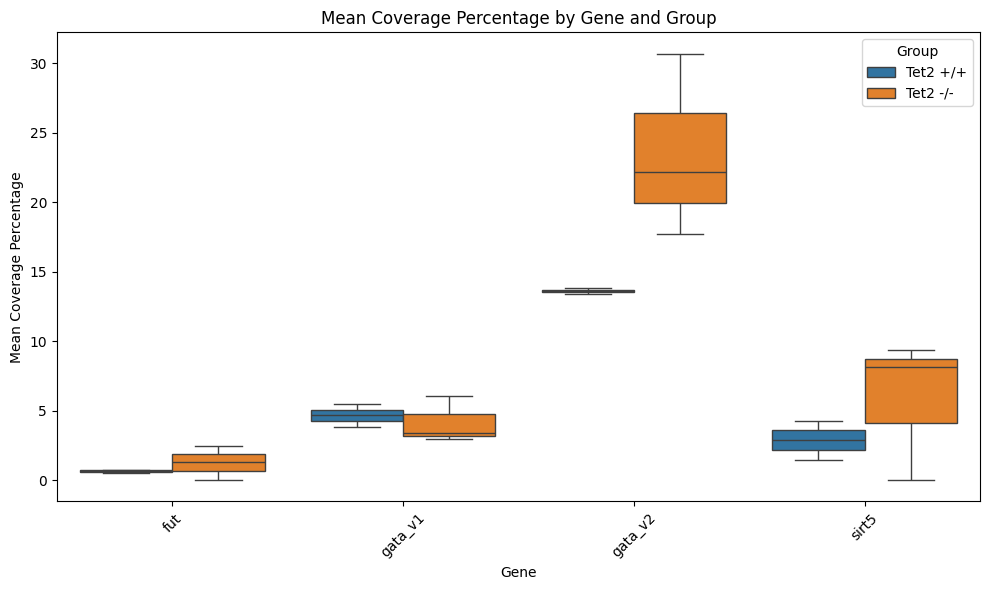

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gene', y='coverage', hue='group', data=melted_df)
plt.title('Mean Coverage Percentage by Gene and Group')
plt.xlabel('Gene')
plt.ylabel('Mean Coverage Percentage')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
print(melted_df)

   index     group     gene   coverage
0     m1  Tet2 +/+      fut   0.544662
1     m2  Tet2 +/+      fut   0.746269
2     m3  Tet2 -/-      fut   0.000000
3     m4  Tet2 -/-      fut   1.327434
4     m5  Tet2 -/-      fut   2.450980
5     m1  Tet2 +/+  gata_v1   3.846154
6     m2  Tet2 +/+  gata_v1   5.479452
7     m3  Tet2 -/-  gata_v1   3.413655
8     m4  Tet2 -/-  gata_v1   6.051454
9     m5  Tet2 -/-  gata_v1   2.953586
10    m1  Tet2 +/+  gata_v2  13.425926
11    m2  Tet2 +/+  gata_v2  13.802083
12    m3  Tet2 -/-  gata_v2  30.687831
13    m4  Tet2 -/-  gata_v2  22.137320
14    m5  Tet2 -/-  gata_v2  17.676768
15    m1  Tet2 +/+    sirt5   4.273504
16    m2  Tet2 +/+    sirt5   1.470588
17    m3  Tet2 -/-    sirt5   9.325397
18    m4  Tet2 -/-    sirt5   0.000000
19    m5  Tet2 -/-    sirt5   8.156028


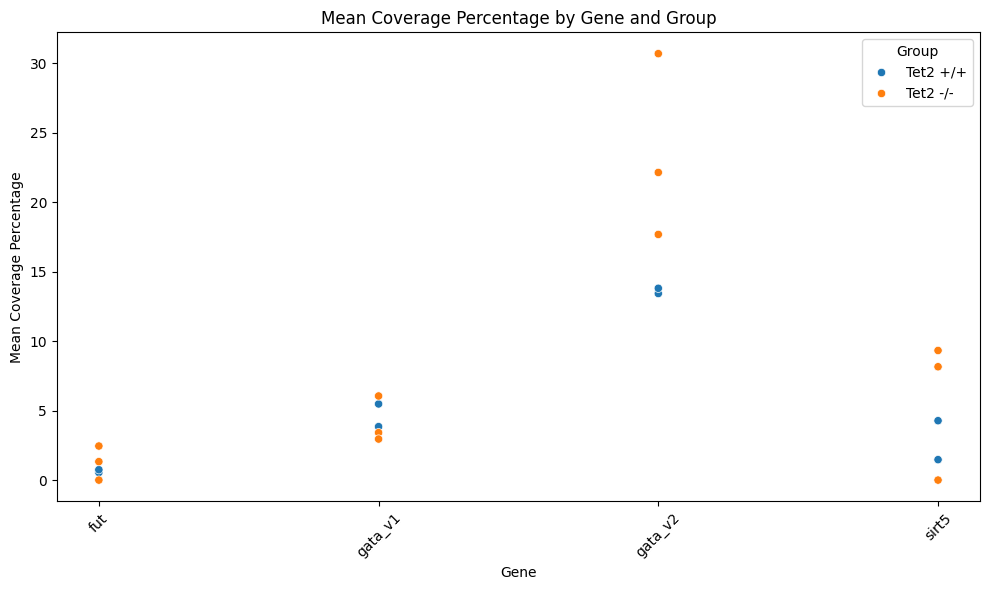

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gene', y='coverage', hue='group', data=melted_df)
plt.title('Mean Coverage Percentage by Gene and Group')
plt.xlabel('Gene')
plt.ylabel('Mean Coverage Percentage')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

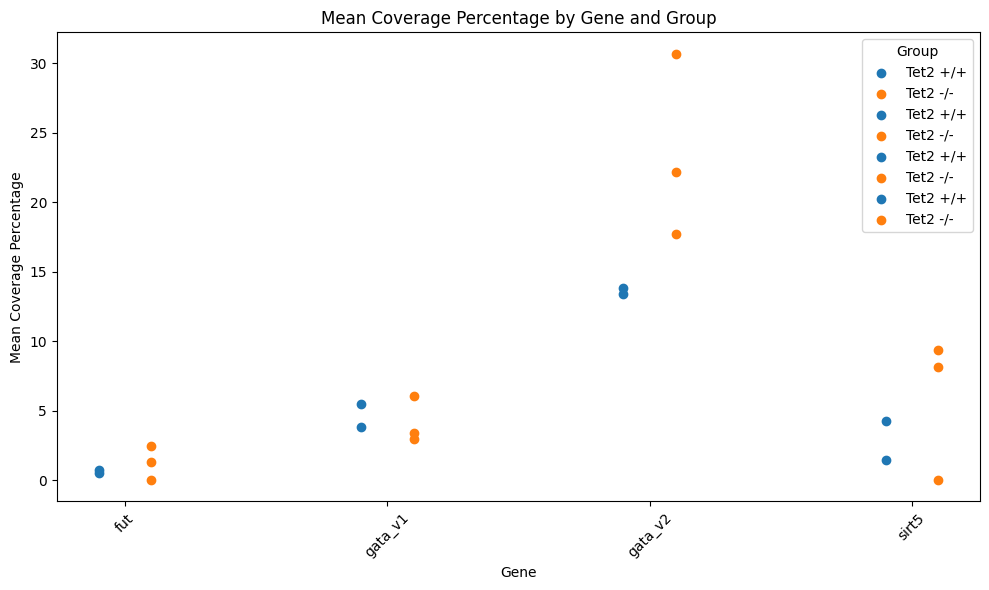

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'melted_df' is your DataFrame containing the data

# Define the width of each group's points
group_width = 0.2  # Adjust as needed

plt.figure(figsize=(10, 6))

# Iterate over unique genes
for i, gene in enumerate(melted_df['gene'].unique()):
    gene_data = melted_df[melted_df['gene'] == gene]
    
    # Define x-axis positions for each group
    x_values = [i - group_width / 2, i + group_width / 2]
    
    # Plot points for each group with adjusted x-axis positions
    for j, group in enumerate(gene_data['group'].unique()):
        group_data = gene_data[gene_data['group'] == group]
        plt.scatter(x=[x_values[j]] * len(group_data), y=group_data['coverage'], label=group, color=sns.color_palette()[j])

plt.title('Mean Coverage Percentage by Gene and Group')
plt.xlabel('Gene')
plt.ylabel('Mean Coverage Percentage')
plt.legend(title='Group')
plt.xticks(ticks=range(len(melted_df['gene'].unique())), labels=melted_df['gene'].unique(), rotation=45)
plt.tight_layout()
plt.show()


/work/iku/exp1019-cancer-epigenetics-and-ervs/virt/lib/python3.10/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/tmp/ipykernel_1224086/1643258568.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


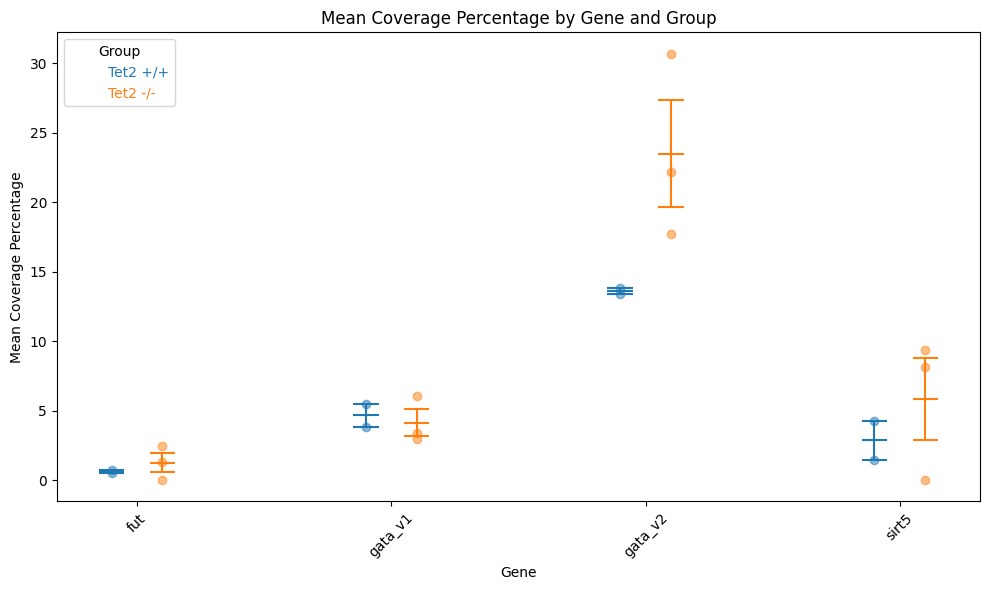

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'melted_df' is your DataFrame containing the data

# Calculate mean and SEM for each group
mean_sem_df = melted_df.groupby(['gene', 'group'])['coverage'].agg(['mean', 'sem']).reset_index()

# Define the width of each group's points
group_width = 0.2  # Adjust as needed

plt.figure(figsize=(10, 6))

# Iterate over unique genes
for i, gene in enumerate(melted_df['gene'].unique()):
    gene_data = melted_df[melted_df['gene'] == gene]
    
    # Define x-axis positions for each group
    x_values = [i - group_width / 2, i + group_width / 2]
    
    # Plot mean with error bars for each group
    for j, group in enumerate(gene_data['group'].unique()):
        group_mean_sem = mean_sem_df[(mean_sem_df['gene'] == gene) & (mean_sem_df['group'] == group)]
        
        # Plot vertical line with three horizontal lines for mean, -SEM, and +SEM
        plt.vlines(x_values[j], ymin=group_mean_sem['mean'] - group_mean_sem['sem'], ymax=group_mean_sem['mean'] + group_mean_sem['sem'], color=sns.color_palette()[j])
        plt.hlines(y=[group_mean_sem['mean'], group_mean_sem['mean'] - group_mean_sem['sem'], group_mean_sem['mean'] + group_mean_sem['sem']], xmin=x_values[j] - group_width / 4, xmax=x_values[j] + group_width / 4, color=sns.color_palette()[j])

        # Plot datapoints
        plt.scatter(x=[x_values[j]] * len(gene_data[gene_data['group'] == group]), y=gene_data[gene_data['group'] == group]['coverage'], color=sns.color_palette()[j], alpha=0.5)

# Customized legend without lines next to the labels
legend = plt.legend(['Tet2 +/+', 'Tet2 -/-'], title='Group', loc='upper left', labelcolor=['C0', 'C1'])
for handle in legend.legendHandles:
    handle.set_linestyle('')  # Remove lines next to the labels

plt.title('Mean Coverage Percentage by Gene and Group')
plt.xlabel('Gene')
plt.ylabel('Mean Coverage Percentage')
plt.xticks(ticks=range(len(melted_df['gene'].unique())), labels=melted_df['gene'].unique(), rotation=45)
plt.tight_layout()
plt.savefig('control_plot.jpg')
plt.show()
